IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yahiathen ABBACHE, Ahmed SAOUDAT

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

**[Q]** Montrer que la distance de Manhattan est bien une mesure de distance.

**[Q]** Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


**[Q]** En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.




## Préparation

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math as m
%matplotlib inline 

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage "base-2D.csv" qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les TP précédent.

In [2]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


Une fois chargée, on peut afficher le contenu de la base d'apprentissage :

In [3]:
data_2D.head(-1)

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


**[Q]** Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


[[ 0.   4. ]
 [ 1.   3.5]
 [ 1.   1. ]
 [ 2.   1. ]
 [ 2.   2. ]
 [ 4.   4. ]
 [ 4.   5. ]
 [ 4.   6. ]
 [ 4.5  1. ]
 [ 4.5  6. ]
 [ 5.   1. ]
 [ 5.   5. ]
 [ 6.   2. ]
 [ 7.   4. ]]


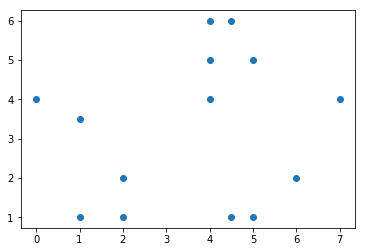

In [4]:
M_data2D= data_2D.as_matrix() # conversion du DataFrame en matrice pour la commande suivante
print(M_data2D)
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

*Rappel*: la librairie <code>pandas</code> permet de connaître le minimum et le maximum d'un <code>DataFrame</code>, par exemple:


In [5]:
# data_2D est le DataFrame dans lequel le fichier "base-2D.csv" a été chargé
for e in data_2D.columns:
    print("colonne", e, ":", data_2D[e].min(), data_2D[e].max())


colonne X : 0.0 7.0
colonne Y : 1.0 6.0


### Normalisation des données

**[Q]** Ecrire la fonction <code>normalisation()</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [6]:

def normalisation(dataFrame):
    
    data=dataFrame.as_matrix()
    for i in range(data.shape[1]):
        minCur=data[:,i].min()
        maxCur=data[:,i].max()
        
        data[:,i]=(data[:,i]-minCur)/(maxCur-minCur)
         
    return data

    


**[Q]** Une fois la fonction de normalisation écrite, normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

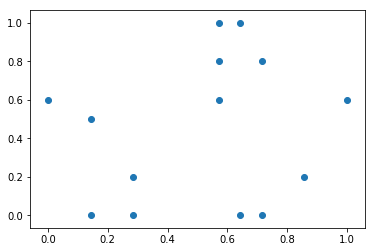

In [7]:
data=normalisation(data_2D)
colonne_X= data[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= data[0: , 1]        # récupération des valeurs de la deuxième colonne

plt.scatter(colonne_X, colonne_Y)  # affichage des points

### Distances entre exemples

**[Q]** Ecrire la fonction <code>dist_euclidienne_vect()</code> qui prend en argument deux exemples et rend leur distance euclidienne. 

In [8]:
def dist_euclidienne_vect(x,y):
    ret=0
    for i in range(len(x)):
        ret+=(x[i]-y[i])**2
    return m.sqrt(ret)

In [9]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

v1 :  [ 0.   0.6] 
v2 :  [ 0.14285714  0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


**[Q]** Ecrire la fonction <code>dist_manhattan_vect()</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [10]:
def dist_manhattan_vect(x,y):
    ret=0
    for i in range(len(x)):
        ret+=m.fabs(x[i]-y[i])
    return ret
    

In [11]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

v1 :  [ 0.   0.6] 
v2 :  [ 0.14285714  0.5       ]
distance de Manhattan entre v1 et v2 :  0.24285714285714283


**[Q]** Ecrire la fonction <code>dist_vect()</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [12]:
def dist_vect(option,x,y):
    if (option == "euclidienne"):
        return dist_euclidienne_vect(x,y)
    return dist_manhattan_vect(x,y)

In [13]:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  [ 0.   0.6] 
v2 :  [ 0.14285714  0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

**[Q]** Ecrire la fonction <code>centroide()</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [14]:
def centroide(matrix_data):
    
    res=np.array([])
    
    if len(np.shape(matrix_data)) > 1:
        for i in range(len(matrix_data[0])):
            #print("le moyenne pour\n",matrix_data)
            res=np.append(res,np.mean(matrix_data[:,i]))
        return res
    return matrix_data
    

In [15]:
M_data2D

array([[ 0.        ,  0.6       ],
       [ 0.14285714,  0.5       ],
       [ 0.14285714,  0.        ],
       [ 0.28571429,  0.        ],
       [ 0.28571429,  0.2       ],
       [ 0.57142857,  0.6       ],
       [ 0.57142857,  0.8       ],
       [ 0.57142857,  1.        ],
       [ 0.64285714,  0.        ],
       [ 0.64285714,  1.        ],
       [ 0.71428571,  0.        ],
       [ 0.71428571,  0.8       ],
       [ 0.85714286,  0.2       ],
       [ 1.        ,  0.6       ]])

In [16]:
centroide(M_data2D)

array([ 0.51020408,  0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche de type "centroid linkage" vue en cours).

**[Q]** Ecrire la fonction <code>dist_groupes()</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [17]:
def dist_groupes(option,g1,g2):
    
    c1=centroide(np.array(g1))
    c2=centroide(np.array(g2))
    
    return dist_vect(option,c1,c2)
    
    

In [18]:
# par exemple :
print(dist_groupes("euclidienne", M_data2D[0:4], M_data2D[5:13]))

0.586345478713841


## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


**[Q]** Ecrire la fonction <code>initialise()</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [19]:
def initialise(data):
    
    res=dict()
    for i in range(np.shape(data)[0]):
        res[i]=[data[i,:]]
        
    return res

In [20]:
# Par exemple:
depart = initialise(M_data2D)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: [array([ 0. ,  0.6])],
 1: [array([ 0.14285714,  0.5       ])],
 2: [array([ 0.14285714,  0.        ])],
 3: [array([ 0.28571429,  0.        ])],
 4: [array([ 0.28571429,  0.2       ])],
 5: [array([ 0.57142857,  0.6       ])],
 6: [array([ 0.57142857,  0.8       ])],
 7: [array([ 0.57142857,  1.        ])],
 8: [array([ 0.64285714,  0.        ])],
 9: [array([ 0.64285714,  1.        ])],
 10: [array([ 0.71428571,  0.        ])],
 11: [array([ 0.71428571,  0.8       ])],
 12: [array([ 0.85714286,  0.2       ])],
 13: [array([ 1. ,  0.6])]}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (c'est-à-dire que la distance entre 2 groupes d'exemples est la distance entre leurs centroides, c'est l'approche "centroid linkage" vue en cours).

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour ne former qu'un unique groupe et ils sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

**[Q]** Ecrire la fonction <code>fusionne()</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [21]:
def fusionne(option, C0):
    
    dmin=1000000
    dCur=2
    ind1=-1
    ind2=-1
    
    for i in C0.keys():
        for j in C0.keys():
            if j>i: 
                dCur=dist_groupes(option,C0[i],C0[j])
                if(dCur < dmin):
                    dmin=dCur
                    ind1=i
                    ind2=j
    C1=dict()
    der=-2
    
    for i in C0.keys():
        if i != ind1 or i != ind2:
            C1[i]=C0[i]
            der=i
            
        
    
    der+=1
    
    #=np.vstack([C0[ind1][0],C0[ind2][0]])
    tmp=[]
    for k in C0[ind1]:
        tmp.append(k)
    for m in C0[ind2]:
        tmp.append(m)
        
    C1[der]=np.array(tmp)

    del C1[ind1]
    del C1[ind2]
    print("fusion de ",ind1," et ",ind2,"pour une distance de ",dmin)
    return C1,ind1,ind2,dmin
                
    

In [22]:
# Par exemple:
depart = initialise(M_data2D)
fusionne("euclidienne",depart)  

fusion de  8  et  10 pour une distance de  0.0714285714285714


({0: [array([ 0. ,  0.6])],
  1: [array([ 0.14285714,  0.5       ])],
  2: [array([ 0.14285714,  0.        ])],
  3: [array([ 0.28571429,  0.        ])],
  4: [array([ 0.28571429,  0.2       ])],
  5: [array([ 0.57142857,  0.6       ])],
  6: [array([ 0.57142857,  0.8       ])],
  7: [array([ 0.57142857,  1.        ])],
  9: [array([ 0.64285714,  1.        ])],
  11: [array([ 0.71428571,  0.8       ])],
  12: [array([ 0.85714286,  0.2       ])],
  13: [array([ 1. ,  0.6])],
  14: array([[ 0.64285714,  0.        ],
         [ 0.71428571,  0.        ]])},
 8,
 10,
 0.0714285714285714)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [23]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2D)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []  # initialisation
i=0
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    #print("fusionne",i)
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    i+=1
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)

fusion de  8  et  10 pour une distance de  0.0714285714285714
fusion de  7  et  9 pour une distance de  0.07142857142857151
fusion de  2  et  3 pour une distance de  0.14285714285714285
fusion de  6  et  11 pour une distance de  0.1428571428571429
fusion de  0  et  1 pour une distance de  0.17437936593905287
fusion de  15  et  17 pour une distance de  0.20316375219039837
fusion de  4  et  16 pour une distance de  0.21237241067597867
fusion de  12  et  14 pour une distance de  0.26811891970176366
fusion de  5  et  19 pour une distance de  0.3047456282855976
fusion de  13  et  22 pour une distance de  0.4542857142857144
fusion de  20  et  21 pour une distance de  0.5000000000000001
fusion de  18  et  24 pour une distance de  0.638139657302555
fusion de  23  et  25 pour une distance de  0.6796842379114776

La matrice M_Fusion obtenue :
 [[  8.          10.           0.07142857   2.        ]
 [  7.           9.           0.07142857   2.        ]
 [  2.           3.           0.14285714   2

Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

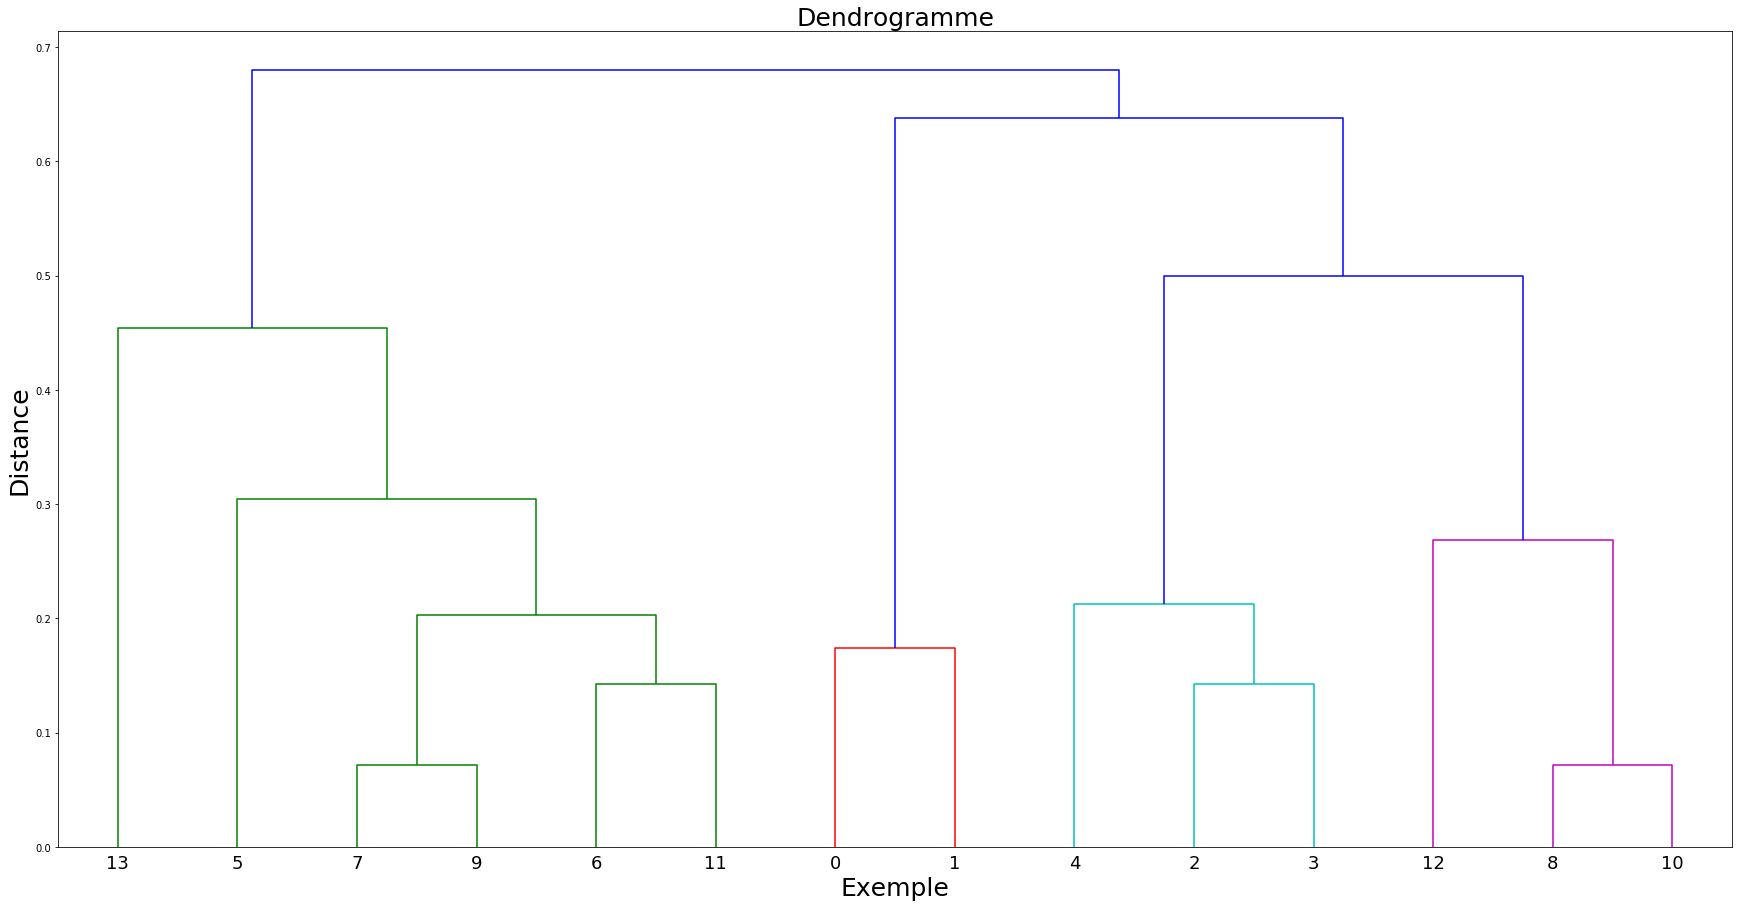

In [24]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

**[Q]** Ecrire la fonction <code>clustering_hierarchique()</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

In [25]:
# --------------------------------------------------------
# Rem: pour info, on pourrait obtenir la matrice M_fusion avec scipy:
#import scipy.cluster.hierarchy
#scipy.cluster.hierarchy.linkage(M_data2D)

# mais on ne l'utilisera pas ici.
# --------------------------------------------------------


def clustering_hierarchique(data, option):
    #initialisation 
    courant = initialise(data)       # clustering courant, au départ:s données data_2D normalisées
    mat_fusion = []  # initialisation
    i=0
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        #print("fusionne",i)
        new,k1,k2,dist_min = fusionne(option,courant)
        if(len(mat_fusion)==0):
            mat_fusion = [k1,k2,dist_min,2]
        else:
            mat_fusion = np.vstack( [mat_fusion,[k1,k2,dist_min,2] ])
        courant = new
        i+=1
        
        
    # Paramètre de la fenêtre d'affichagemat_fusion
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        mat_fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    return mat_fusion



### Comparaison de distances

**[Q]** Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne.

fusion de  8  et  10 pour une distance de  0.0714285714285714
fusion de  7  et  9 pour une distance de  0.07142857142857151
fusion de  2  et  3 pour une distance de  0.14285714285714285
fusion de  6  et  11 pour une distance de  0.1428571428571429
fusion de  15  et  17 pour une distance de  0.23571428571428554
fusion de  0  et  1 pour une distance de  0.24285714285714283
fusion de  4  et  16 pour une distance de  0.27142857142857146
fusion de  5  et  18 pour une distance de  0.35357142857142854
fusion de  12  et  14 pour une distance de  0.3785714285714285
fusion de  20  et  22 pour une distance de  0.5000000000000001
fusion de  13  et  21 pour une distance de  0.6257142857142859
fusion de  19  et  24 pour une distance de  0.857142857142857
fusion de  23  et  25 pour une distance de  0.7095238095238097


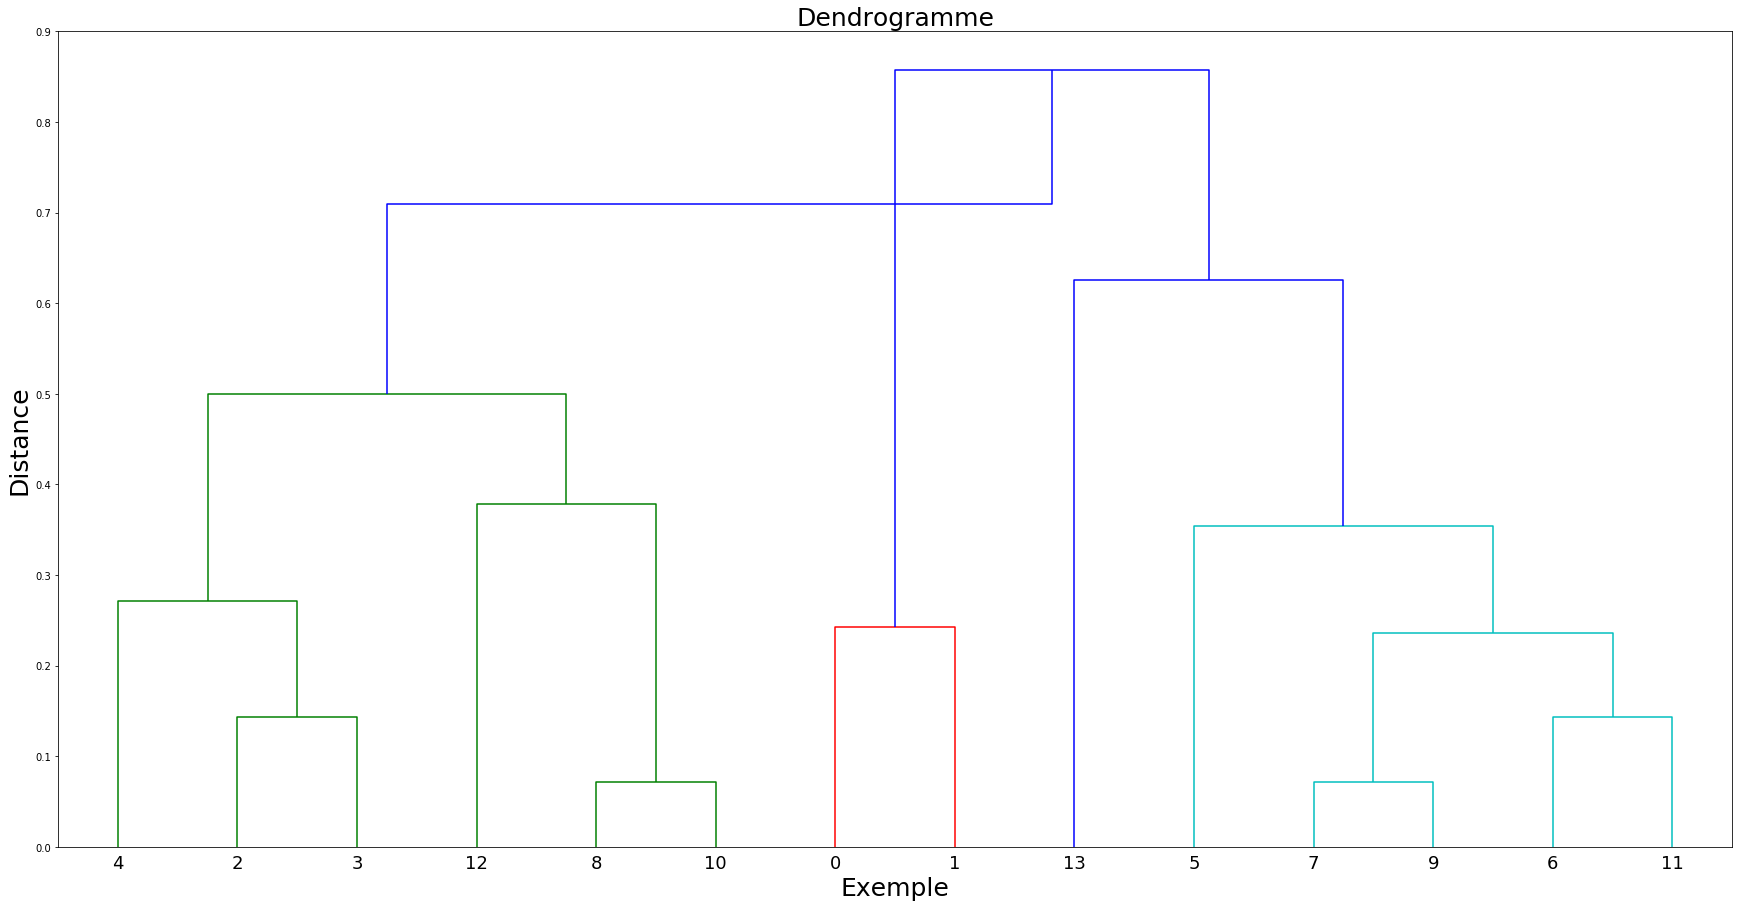

In [26]:
M_Fusion_manathan=clustering_hierarchique(M_data2D,"manhattan")

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage" vue en cours. Dans cette approche, la distance entre deux clusters G1 et G2 est égale à la plus grande distance existante entre un exemple de G1 et un exemple de G2.

**[Q]** Ecrire la fonction <code>dist_max_groupes()</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [27]:
def dist_max_groupes(option,g1,g2):
    dmax=0
    dcur=0
    for e1 in g1:
        for e2 in g2:
            dcur=dist_vect(option,e1,e2)
            if dmax<dcur:
                dmax=dcur
    return dmax

In [28]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

La distance <code>dist_max_groupes()</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet ("complete linkage") entre les clusters (cf. cours).

**[Q]** Implémenter une variante du clustering hiérarchique qui utilise cette distance.

### Définition de fusionne complete linkage


In [39]:
def fusionneComplete(option, C0):
    
    dmin=100000
    dCur=2
    ind1=-1
    ind2=-1
    for i in C0.keys():
        for j in C0.keys():
            if j>i: 
                dCur=dist_max_groupes(option,C0[i],C0[j])
                if(dCur < dmin):
                    dmin=dCur
                    ind1=i
                    ind2=j
    C1=dict()
    der=-2
    
    for i in C0.keys():
        if i != ind1 or i != ind2:
            C1[i]=C0[i]
            der=i
            
        
    
    der+=1
    #tmp=[C0[ind1][0]]
    
    tmp=np.vstack([C0[ind1][0],C0[ind2][0]])
    C1[der]=np.array(tmp)

    del C1[ind1]
    del C1[ind2]
    print("fusion de ",ind1," et ",ind2,"pour une distance de ",dmin)
    return C1,ind1,ind2,dmin
                

In [40]:
def clustering_hierarchiqueCompleteLinkage(data, option):
    #initialisation 
    courant = initialise(data)       # clustering courant, au départ:s données data_2D normalisées
    mat_fusion = []  # initialisation
    i=0
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        #print("fusionne",i)
        new,k1,k2,dist_min = fusionneComplete(option,courant)
        if(len(mat_fusion)==0):
            mat_fusion = [k1,k2,dist_min,2]
        else:
            mat_fusion = np.vstack( [mat_fusion,[k1,k2,dist_min,2] ])
        courant = new
        i+=1
        
        
    # Paramètre de la fenêtre d'affichagemat_fusion
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        mat_fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    return mat_fusion


fusion de  8  et  10 pour une distance de  0.0714285714285714
fusion de  7  et  9 pour une distance de  0.07142857142857151
fusion de  2  et  3 pour une distance de  0.14285714285714285
fusion de  6  et  11 pour une distance de  0.1428571428571429
fusion de  0  et  1 pour une distance de  0.17437936593905287
fusion de  15  et  17 pour une distance de  0.2457807219155036
fusion de  4  et  16 pour une distance de  0.24578072191550362
fusion de  12  et  14 pour une distance de  0.2931183504097598
fusion de  5  et  19 pour une distance de  0.4
fusion de  13  et  22 pour une distance de  0.5862367008195198
fusion de  18  et  20 pour une distance de  0.6167723755692258
fusion de  21  et  23 pour une distance de  0.6982485377057106
fusion de  24  et  25 pour une distance de  1.0


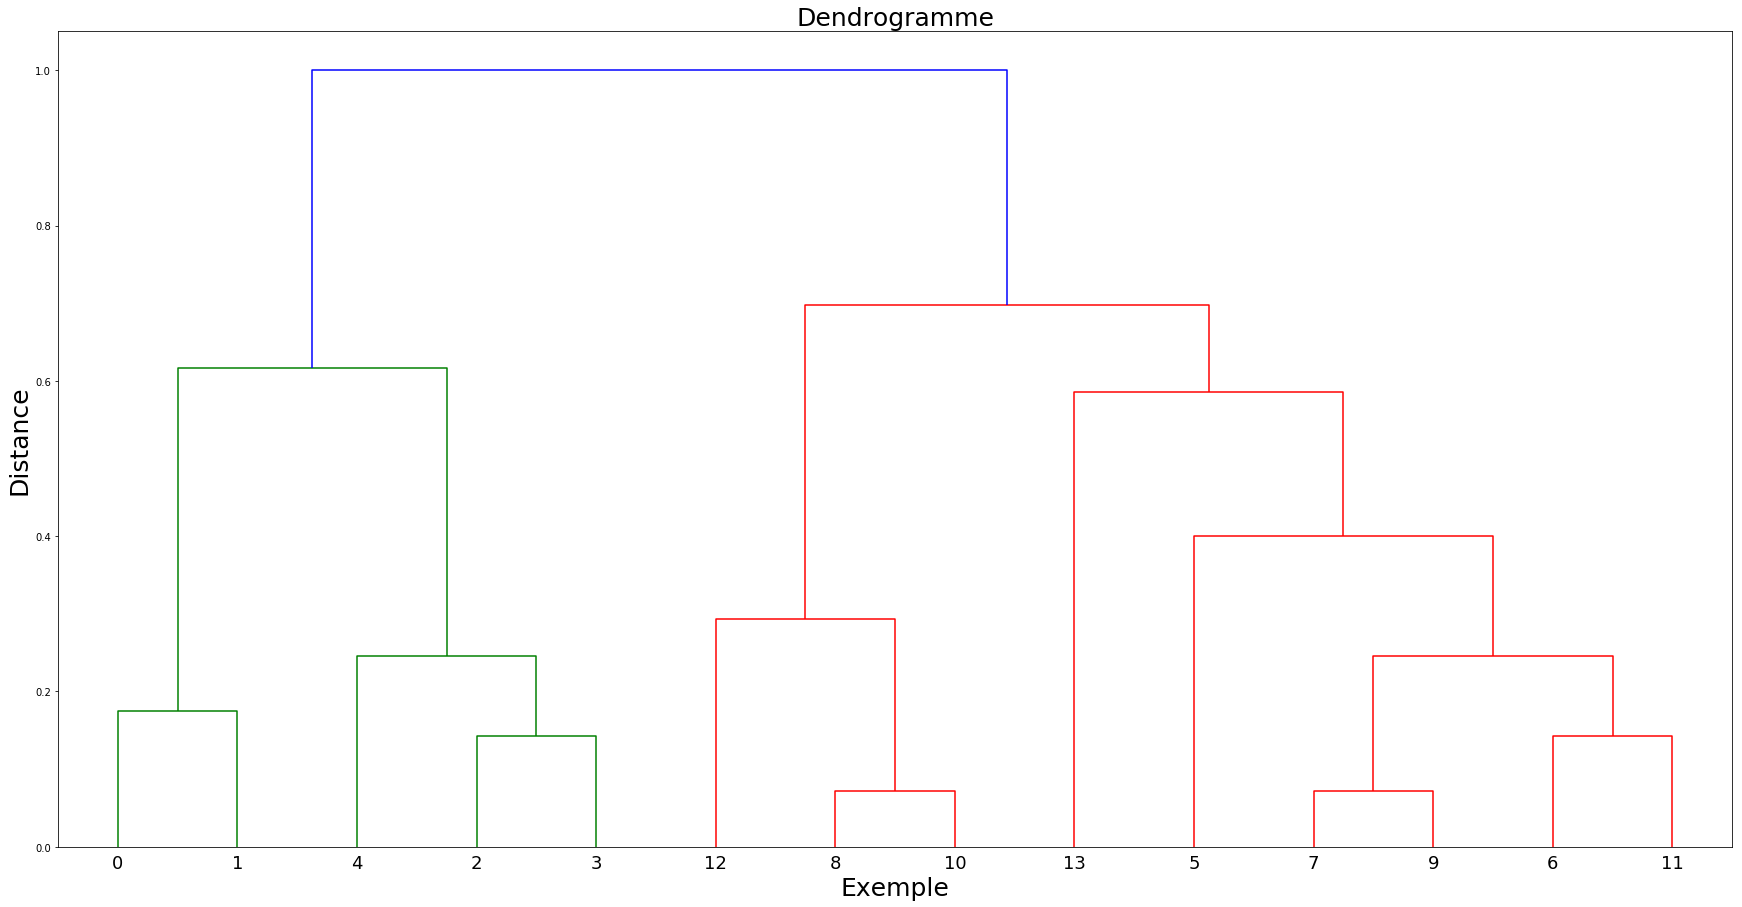

In [41]:
M_Fusion_complete_linkage=clustering_hierarchiqueCompleteLinkage(M_data2D,"euclidienne")

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

**[Q]** Etudier cette base et les clusters qui peuvent être mis en évidence.





In [62]:
data_Paris = pd.read_csv("data/base-Paris.csv",sep=";")

In [63]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Totalarrondissement2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5,NaN
7,75002,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


### Préparation des données

In [64]:
arrondi=data_Paris[["Granularité"]]
data_Paris=data_Paris.drop(["Granularité","Totalarrondissement2011"], axis=1)
print(arrondi)
data_Paris.head(-1)

#M_data_Paris=data_Paris.as_matrix()

   Granularité
0        75007
1        75013
2        75014
3        75015
4        75017
5        75018
6        75019
7        75002
8        75004
9        75008
10       75012
11       75016
12       75020
13   ToutParis
14       75001
15       75005
16       75006
17       75010
18       75011
19       75003
20       75009


,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [65]:
### sed -i -e "s/"\;"/","/g" test.csv 
M_data_Paris=data_Paris.as_matrix()

print(M_data_Paris)

[[  288.1   249.1   303.7   255.8   287.8   288.4   249.6   185.6   281.3
    284.3   296.4   301.1]
 [  596.5   540.2   618.5   558.6   595.9   581.7   539.2   490.5   597.8
    575.7   580.5   601.4]
 [  464.    404.9   465.3   420.2   405.3   446.    412.9   348.7   449.3
    446.3   453.1   484.3]
 [  903.1   801.4   937.5   835.5   876.8   888.6   628.8   674.8   913.3
    878.7   895.7   935.8]
 [  451.1   412.4   491.6   422.7   363.6   446.4   409.5   332.3   416.4
    451.5   475.1   513.5]
 [  427.    394.3   455.2   419.9   458.3   456.6   418.    361.8   464.6
    453.4   478.5   470.9]
 [  323.4   287.3   350.3   317.8   336.9   340.7   311.6   281.    345.6
    335.6   367.    354.5]
 [  153.    125.8   136.6   126.6   133.2   127.6   126.7   114.3   144.3
    145.1   129.5   129.8]
 [  116.3   115.7   133.4   115.    123.2   120.5   114.5    97.6   130.5
    123.    124.3   133.7]
 [  252.6   246.7   252.9   232.5   199.4   236.4   175.4   189.4   266.6
    230.3   257.7

**[Q]** Préparer un rapport d'analyse (c'est-à-dire, compléter cette page ipython en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


fusion de  0  et  16 pour une distance de  44.421278684882544
fusion de  7  et  8 pour une distance de  53.78605767296949
fusion de  15  et  18 pour une distance de  70.04291541619322
fusion de  2  et  4 pour une distance de  73.39114387989875
fusion de  19  et  22 pour une distance de  74.79112581048638
fusion de  14  et  24 pour une distance de  98.26018748427282
fusion de  5  et  23 pour une distance de  98.81181609503994
fusion de  17  et  26 pour une distance de  119.07484574371233
fusion de  9  et  25 pour une distance de  126.98828193971285
fusion de  10  et  27 pour une distance de  128.66252610997498
fusion de  6  et  12 pour une distance de  191.00437167771838
fusion de  13  et  21 pour une distance de  201.9366856220038
fusion de  1  et  11 pour une distance de  220.42381903959472
fusion de  20  et  28 pour une distance de  226.70057719379543
fusion de  29  et  30 pour une distance de  336.11182172009353
fusion de  31  et  33 pour une distance de  408.19415967828945
fusion d

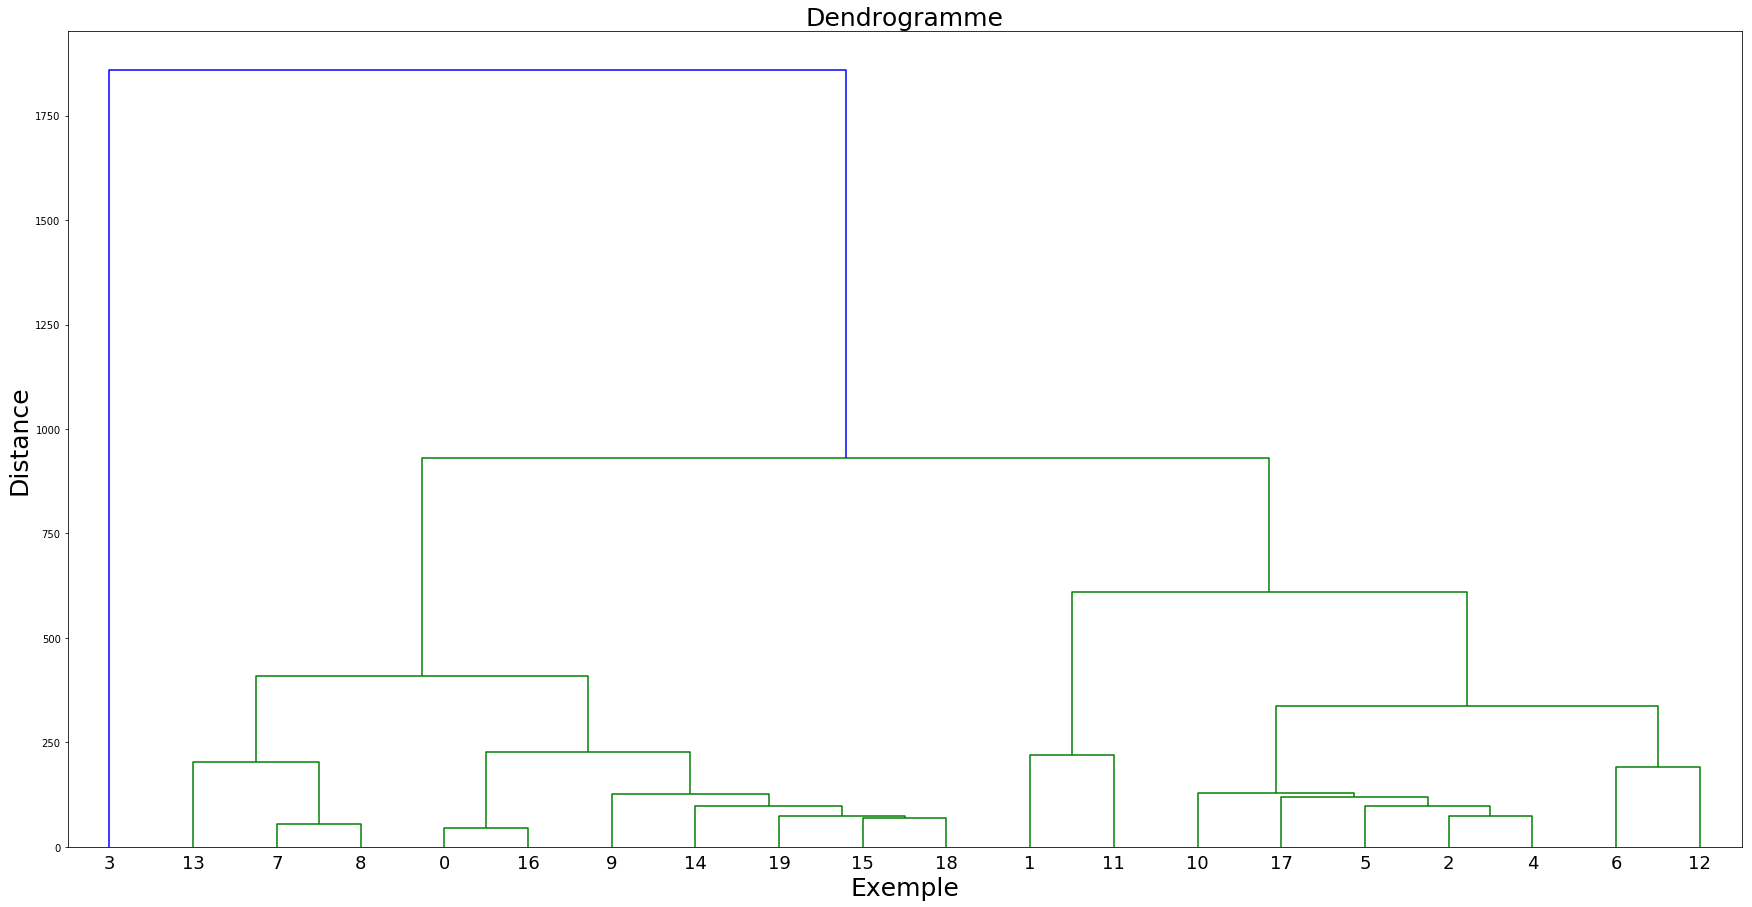

In [46]:
for i in range(len(M_data_Paris)):
    M_data_Paris[i]=[float(k) for k in M_data_Paris[i,:]]

M_data_Paris = np.delete(M_data_Paris, 13, 0)

centroide_euclidienne=clustering_hierarchique(M_data_Paris,"euclidienne")

fusion de  0  et  16 pour une distance de  119.1
fusion de  7  et  8 pour une distance de  152.59999999999997
fusion de  2  et  4 pour une distance de  200.39999999999992
fusion de  15  et  19 pour une distance de  203.3
fusion de  18  et  23 pour une distance de  215.54999999999993
fusion de  5  et  22 pour une distance de  260.70000000000005
fusion de  9  et  14 pour une distance de  271.2
fusion de  17  et  25 pour une distance de  328.6333333333334
fusion de  24  et  26 pour une distance de  369.76666666666665
fusion de  10  et  27 pour une distance de  419.7249999999999
fusion de  6  et  12 pour une distance de  615.4999999999999
fusion de  1  et  11 pour une distance de  689.8
fusion de  13  et  21 pour une distance de  697.4000000000001
fusion de  20  et  28 pour une distance de  762.61
fusion de  29  et  30 pour une distance de  1152.35
fusion de  32  et  33 pour une distance de  1403.9952380952382
fusion de  31  et  34 pour une distance de  2100.042857142857
fusion de  35  et 

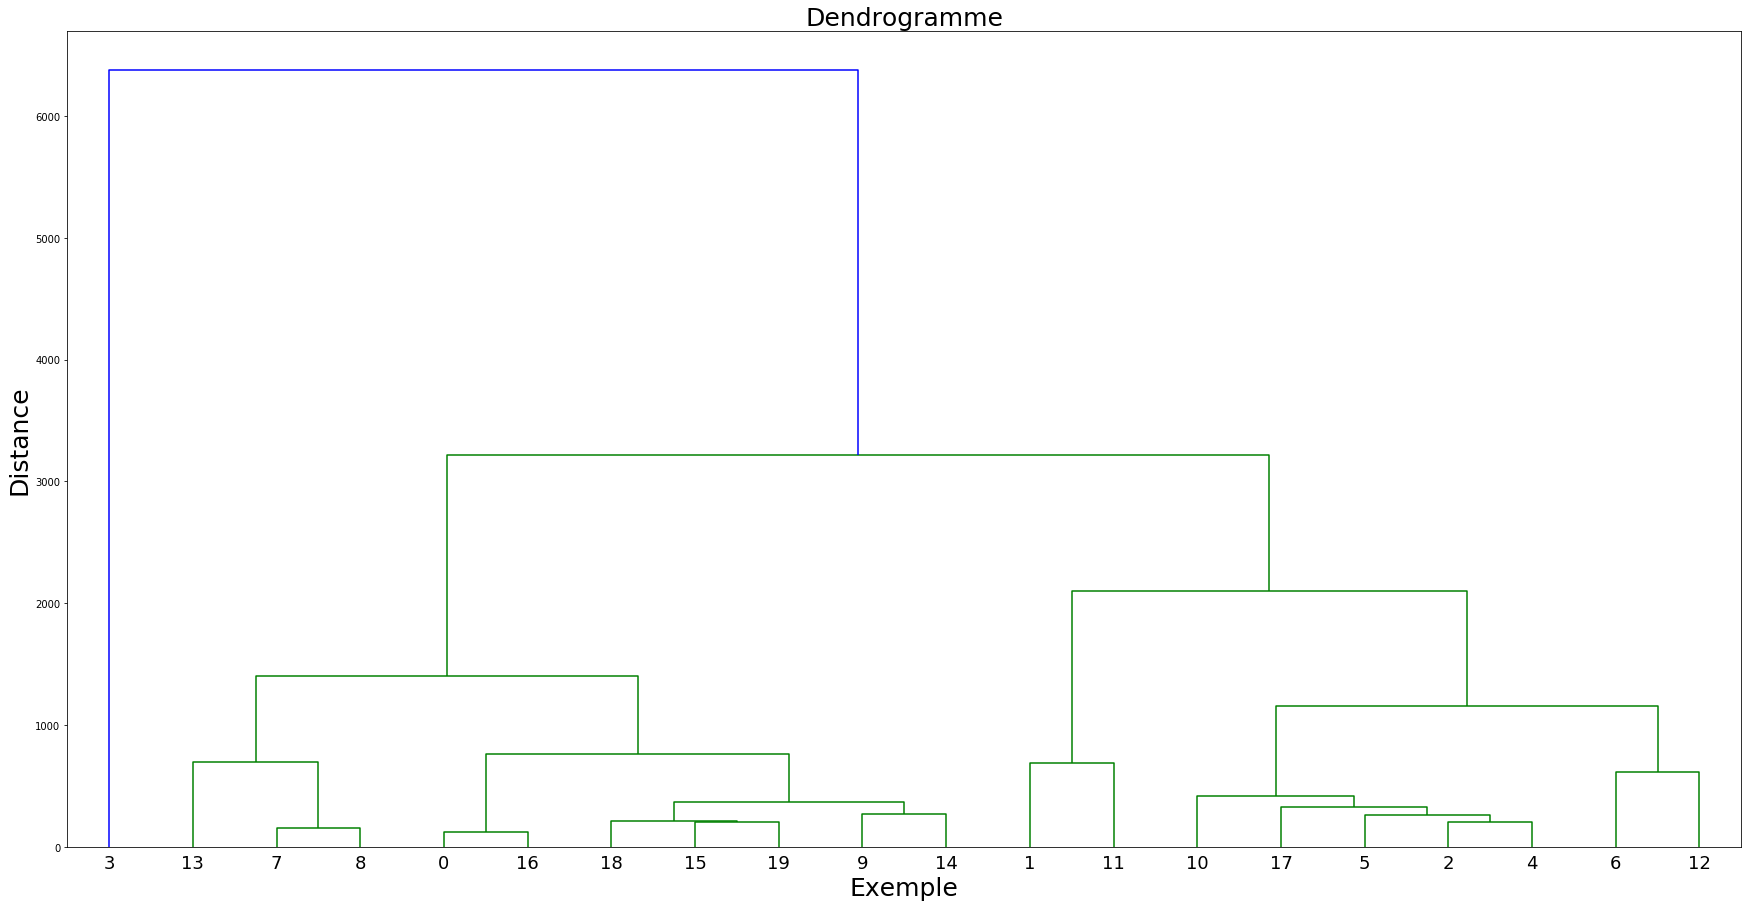

In [47]:
centroide_euclidienne_paris=clustering_hierarchique(M_data_Paris,"manhattan")


### Analyse sur La Centroidelinkage
Le dendogramme utilisant la distance de Manhattan a tendance à mettre en valeur les écarts entre les clusters d'avantage que celui utilisant la distance euclidienne.
En effet cela est logique, la distance de Manhattan est toujours supérieure du moins égale à la distance euclidienne.
Globalement on observe une meilleure séparation sur le dendogramme utilitant Mahattan.

Ces dendogrammes nous apprennent qu'il y a une différence de comportement entre les arrondissement d'indice 3 (outlayer) d'un côté, les arrondissements d'indices 7, 8, 0, 15, 17, 14, 18, 9, 13 d'un autre côté, et finalement les arrondissement restants.

fusion de  0  et  16 pour une distance de  44.421278684882544
fusion de  7  et  8 pour une distance de  53.78605767296949
fusion de  15  et  18 pour une distance de  70.04291541619322
fusion de  2  et  4 pour une distance de  73.39114387989875
fusion de  14  et  19 pour une distance de  79.2713693586783
fusion de  5  et  17 pour une distance de  110.58982774197634
fusion de  9  et  24 pour une distance de  125.31037467025624
fusion de  10  et  25 pour une distance de  152.425457191376
fusion de  23  et  27 pour une distance de  159.20062813946433
fusion de  22  et  26 pour une distance de  173.62687004032526
fusion de  6  et  12 pour une distance de  191.00437167771838
fusion de  1  et  11 pour une distance de  220.42381903959472
fusion de  13  et  21 pour une distance de  223.53008746027908
fusion de  20  et  29 pour une distance de  285.3125829682245
fusion de  28  et  30 pour une distance de  498.7469899658543
fusion de  32  et  33 pour une distance de  712.6241155055027
fusion de  

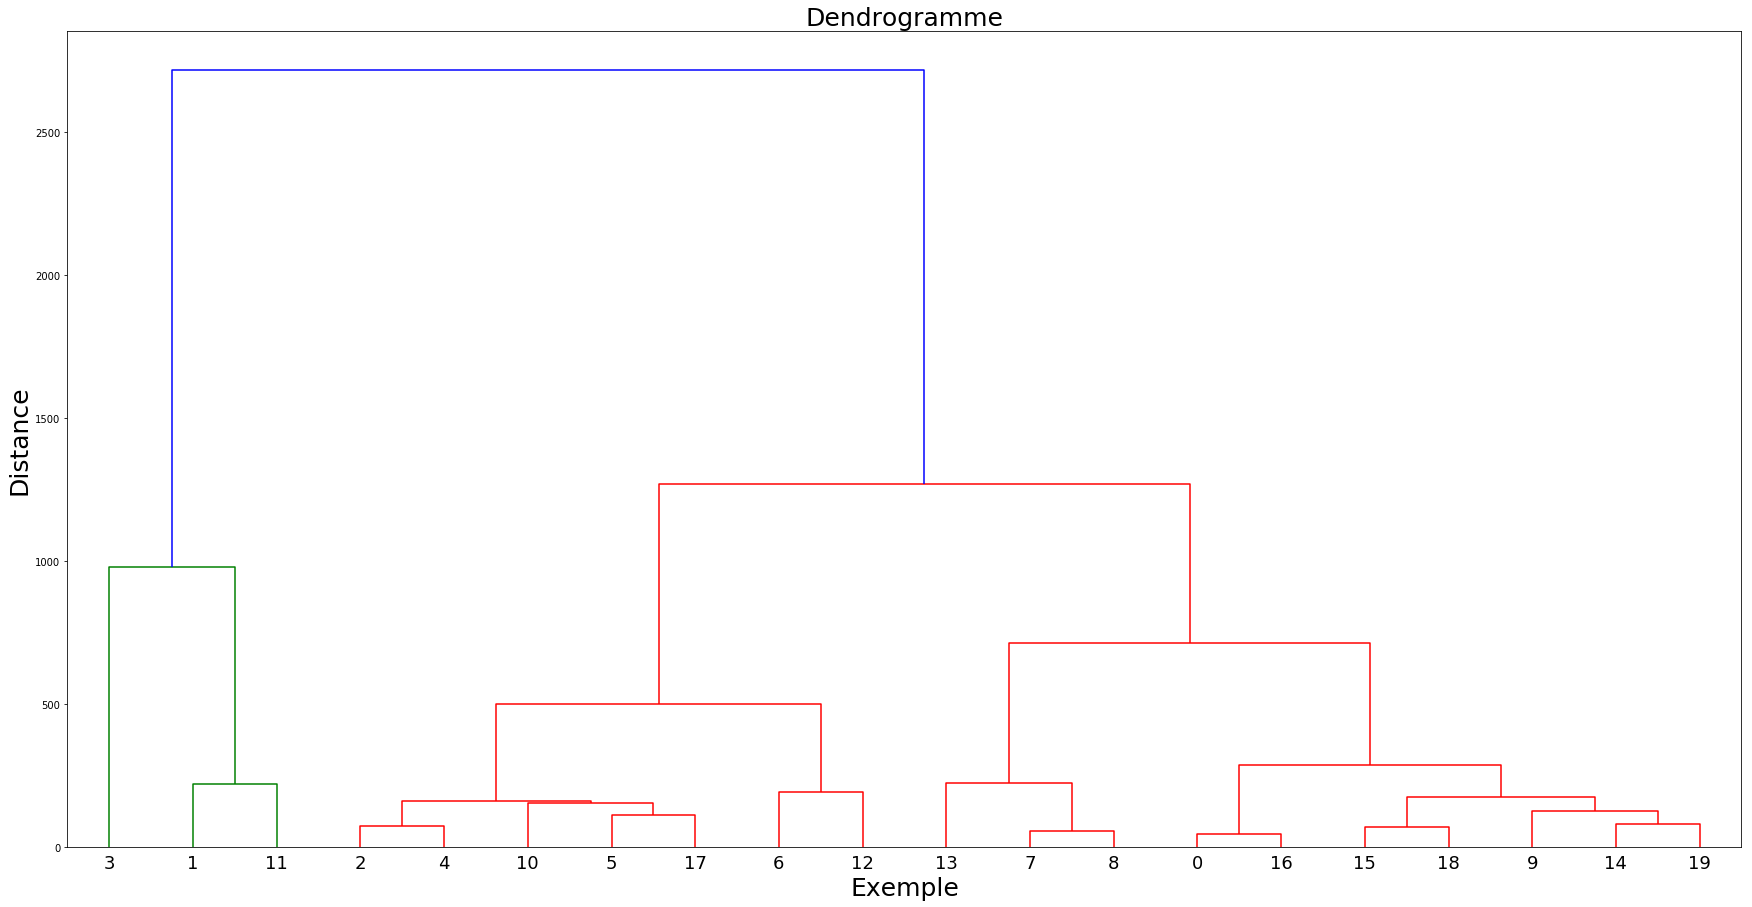

In [48]:
M_Fusion_paris_complete_linkage=clustering_hierarchiqueCompleteLinkage(M_data_Paris,"euclidienne")

fusion de  0  et  16 pour une distance de  119.1
fusion de  7  et  8 pour une distance de  152.59999999999997
fusion de  2  et  4 pour une distance de  200.39999999999992
fusion de  15  et  19 pour une distance de  203.3
fusion de  9  et  14 pour une distance de  271.2
fusion de  18  et  23 pour une distance de  273.4000000000001
fusion de  5  et  22 pour une distance de  320.4000000000001
fusion de  17  et  26 pour une distance de  331.4999999999999
fusion de  10  et  27 pour une distance de  504.2
fusion de  24  et  25 pour une distance de  551.5
fusion de  6  et  12 pour une distance de  615.4999999999999
fusion de  1  et  11 pour une distance de  689.8
fusion de  13  et  21 pour une distance de  769.8000000000001
fusion de  20  et  29 pour une distance de  1019.2
fusion de  30  et  33 pour une distance de  1676.1000000000001
fusion de  28  et  31 pour une distance de  1914.9
fusion de  32  et  34 pour une distance de  3129.0
fusion de  3  et  35 pour une distance de  4519.9
fusion 

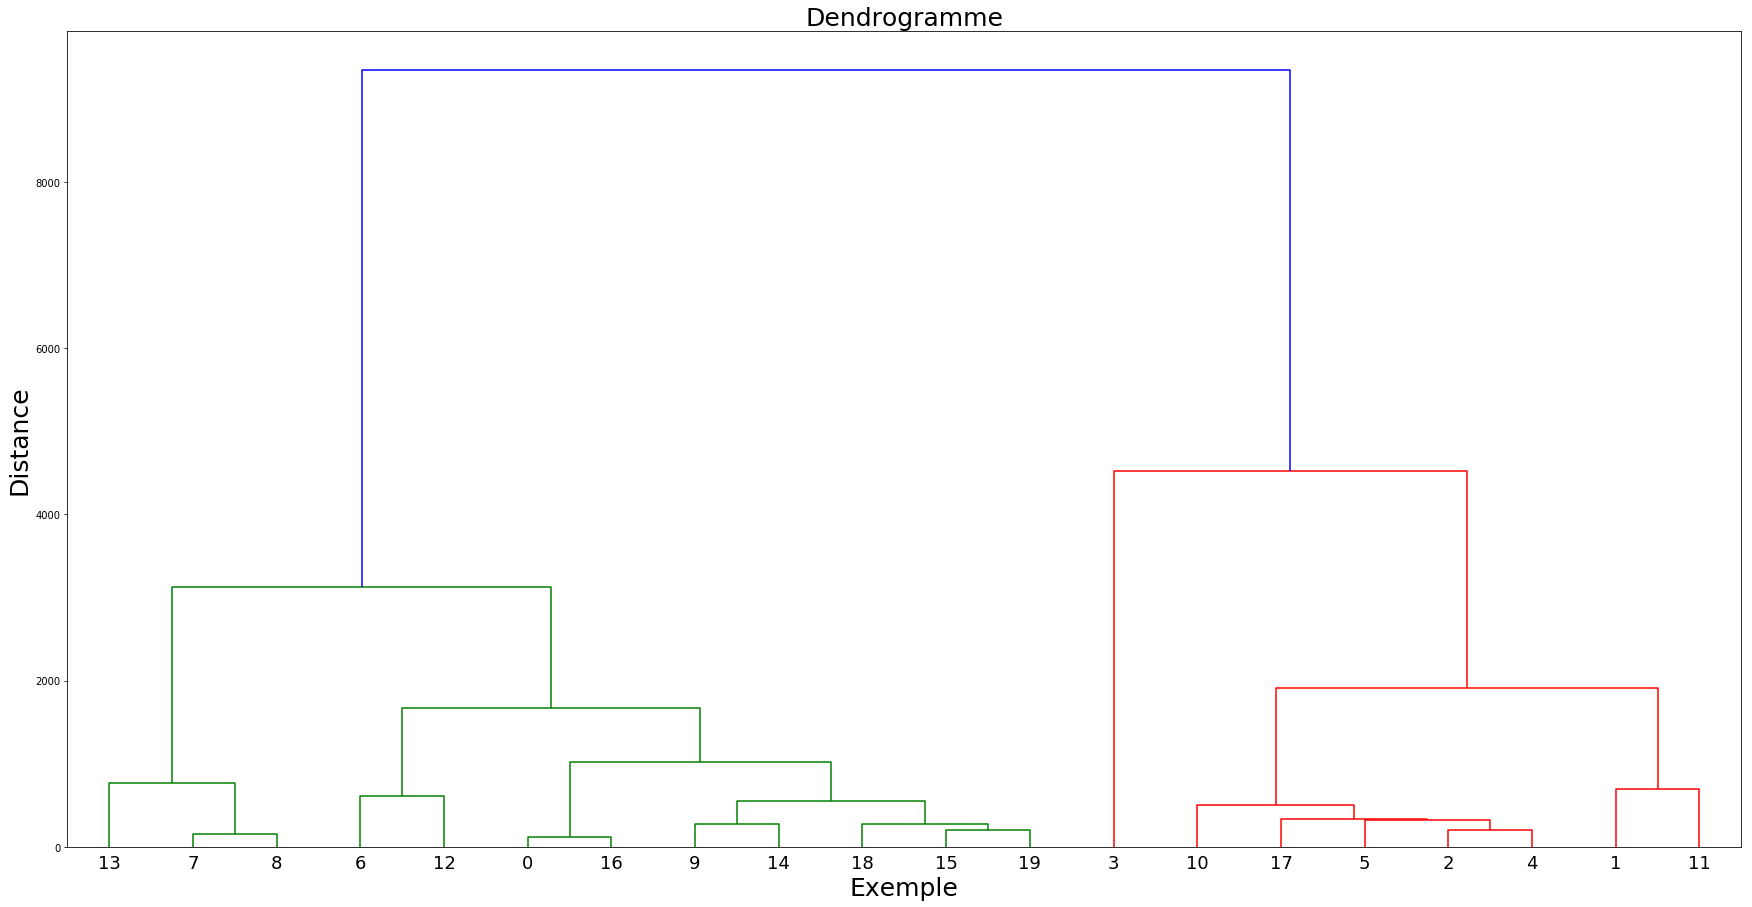

In [51]:
M_Fusion_paris_complete_linkage_manhattan=clustering_hierarchiqueCompleteLinkage(M_data_Paris,"manhattan")

### analyse du modele avec completeLinkage

On obsreve une différence remarquable entre les dendrogrammes avce centroide linkage et complete linkage.
Dans le second on retient des distances entre deux éléments extrêmes de deux groupes, la séparation des clusters entre eux est donc plus importante. On remarque un meilleure éparpillement des clusters.

# METHODE AVEC UN SEUIL DE DISTANCE MAXIMALE ENTRE LES ELEMENTS 
## Utilisation d'un seuil de distance dans la fonction fusionne 

In [54]:
def fusion_ceil(option, C0, ceil):
    
    dmin=ceil
    dCur=2
    ind1=-1
    ind2=-1
    
    for i in C0.keys():
        for j in C0.keys():
            if j>i: 
                dCur=dist_groupes(option,C0[i],C0[j])
                if(dCur < dmin):
                    dmin=dCur
                    ind1=i
                    ind2=j
                  
    if dmin==ceil:
        return C0,ind1,ind2,ceil
    
    C1=dict()
    der=-2
    
    for i in C0.keys():
        if i != ind1 or i != ind2:
            C1[i]=C0[i]
            der=i
            
        
    
    der+=1
    
    #=np.vstack([C0[ind1][0],C0[ind2][0]])
    tmp=[]
    for k in C0[ind1]:
        tmp.append(k)
    for m in C0[ind2]:
        tmp.append(m)
        
    C1[der]=np.array(tmp)

    del C1[ind1]
    del C1[ind2]
    print("fusion de ",ind1," et ",ind2,"pour une distance de ",dmin)
    return C1,ind1,ind2,dmin
                
def clustering_hierarchique_ceil(data, option, ceil):
    #initialisation 
    courant = initialise(data)       # clustering courant, au départ:s données data_2D normalisées
    mat_fusion = []  # initialisation
    i=0
    dist_min=100000
    while len(courant) >=2 and dist_min != ceil:              # tant qu'il y a 2 groupes à fusionner
        #print("fusionne",i)
        new,k1,k2,dist_min = fusion_ceil(option,courant,ceil)
        if k1!= -1 and k2!=-1:
            if(len(mat_fusion)==0):
                mat_fusion = [k1,k2,dist_min,2]
            else:
                mat_fusion = np.vstack( [mat_fusion,[k1,k2,dist_min,2] ])
        courant = new
        i+=1
        
    print(mat_fusion)
    """
    # Paramètre de la fenêtre d'affichagemat_fusion
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        mat_fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    """
    return mat_fusion




In [55]:
centroide_euclidienne_ceil=clustering_hierarchique_ceil(M_data_Paris,"euclidienne",800)

fusion de  0  et  16 pour une distance de  44.421278684882544
fusion de  7  et  8 pour une distance de  53.78605767296949
fusion de  15  et  18 pour une distance de  70.04291541619322
fusion de  2  et  4 pour une distance de  73.39114387989875
fusion de  19  et  22 pour une distance de  74.79112581048638
fusion de  14  et  24 pour une distance de  98.26018748427282
fusion de  5  et  23 pour une distance de  98.81181609503994
fusion de  17  et  26 pour une distance de  119.07484574371233
fusion de  9  et  25 pour une distance de  126.98828193971285
fusion de  10  et  27 pour une distance de  128.66252610997498
fusion de  6  et  12 pour une distance de  191.00437167771838
fusion de  13  et  21 pour une distance de  201.9366856220038
fusion de  1  et  11 pour une distance de  220.42381903959472
fusion de  20  et  28 pour une distance de  226.70057719379543
fusion de  29  et  30 pour une distance de  336.11182172009353
fusion de  31  et  33 pour une distance de  408.19415967828945
fusion d